### Import modules and functions

In [1]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import plot_confusion_matrix from funcs.py
from funcs import plot_confusion_matrix

### Importing and cleaning data

In [3]:
# Import dataset
data = 'data.csv'
df = pd.read_csv(data)

In [4]:
# Check for missing values
df.isna().any()

Call Failure               False
Complains                  False
Subscription Length        False
Charge Amount              False
Seconds of Use             False
Frequency of use           False
Frequency of SMS           False
Distinct Called Numbers    False
Age Group                  False
Tariff Plan                False
Status                     False
Age                        False
Customer Value             False
Churn                      False
dtype: bool

In [5]:
# Check data types
df.dtypes

Call Failure                 int64
Complains                    int64
Subscription Length          int64
Charge Amount                int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
Churn                        int64
dtype: object

In [6]:
# List categorical columns 
cat_col = ['Complains', 'Charge Amount', 'Age Group', 'Tariff Plan', 'Status', 'Churn']

# Convert columns to categorical
for i in cat_col:
    df[i] = df[i].astype('category').sort_values()

In [7]:
# Verify change
df.dtypes

Call Failure                  int64
Complains                  category
Subscription Length           int64
Charge Amount              category
Seconds of Use                int64
Frequency of use              int64
Frequency of SMS              int64
Distinct Called Numbers       int64
Age Group                  category
Tariff Plan                category
Status                     category
Age                           int64
Customer Value              float64
Churn                      category
dtype: object

### Model development

In [8]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split data into training and test set
train_set, test_set = train_test_split(df, test_size=0.25, random_state=42)

In [9]:
# Create df of features from training set
df = train_set.drop('Churn', axis=1)

In [10]:
# Create df of labels from training set
df_labels = train_set['Churn'].copy()

In [11]:
# Seperate categorical features 
cat_col = ['Complains', 'Charge Amount', 'Age Group','Tariff Plan', 'Status']
df_cat = df[cat_col]

In [12]:
# Seperate numerical features
df_num = df.drop(cat_col, axis=1)

In [13]:
# Import OneHotEncoder, StandardScaler, Pipeline, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [14]:
# Convert numerical and categorical attributes into list
num_attribs = list(df_num)
cat_attribs = list(df_cat)

In [15]:
# Create pipeline steps for numerical features
num_pipeline = Pipeline([
                ('std_scaler', StandardScaler())
                        ])

In [16]:
# Create pipeline steps for categorical features
cat_pipeline = Pipeline([
                ('one_hot_encoder', OneHotEncoder())
                        ])

In [17]:
# Create pipeline
full_pipeline = ColumnTransformer([
                ('num', num_pipeline, num_attribs),
                ('cat', cat_pipeline, cat_attribs),
                                    ])

In [18]:
# Fit and transform attributes 
df_prepared = full_pipeline.fit_transform(df)

### DecisionTreeClassifier

In [19]:
# Import DecisionTreeClassifier, classification_report, and confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate DecisionTreeClassifier object: dt
dt = DecisionTreeClassifier()

# Fit data
dt.fit(df_prepared, df_labels)

# Predict training set
churn_predictions = dt.predict(df_prepared)

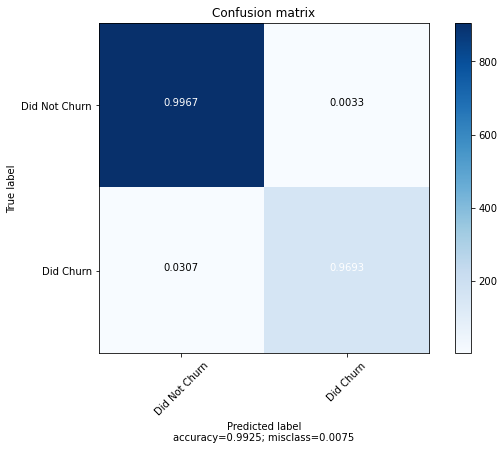

In [20]:
# Create confusion matrix
churn_cm = confusion_matrix(df_labels, churn_predictions)

# Plot confusion matrix
plot_confusion_matrix(churn_cm, ['Did Not Churn', 'Did Churn'])

In [21]:
# Compute resulting metrics
print(classification_report(df_labels, churn_predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       908
           1       0.98      0.97      0.98       163

    accuracy                           0.99      1071
   macro avg       0.99      0.98      0.99      1071
weighted avg       0.99      0.99      0.99      1071



In [22]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

### Logistic Regression

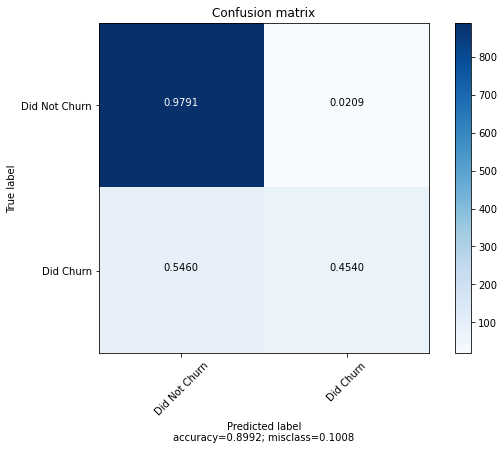

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       908
           1       0.80      0.45      0.58       163

    accuracy                           0.90      1071
   macro avg       0.85      0.72      0.76      1071
weighted avg       0.89      0.90      0.89      1071



In [23]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate LogisticRegression object: logreg
logreg = LogisticRegression()

# Fit and predict
logreg.fit(df_prepared, df_labels)
churn_predictions = logreg.predict(df_prepared)

# Create confusion matrix
churn_cm = confusion_matrix(df_labels, churn_predictions)

# Plot confusion matrix
plot_confusion_matrix(churn_cm, ['Did Not Churn', 'Did Churn'])

# Compute resulting metrics
print(classification_report(df_labels, churn_predictions))

### SVC

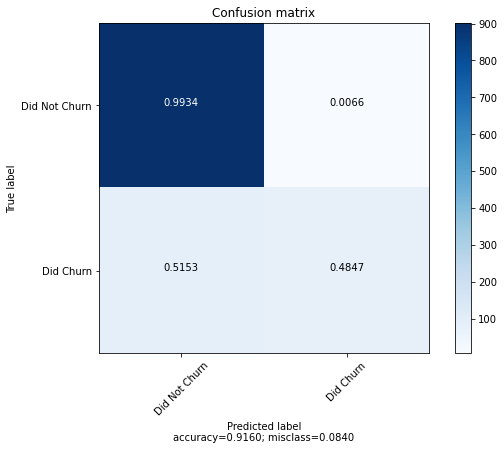

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       908
           1       0.93      0.48      0.64       163

    accuracy                           0.92      1071
   macro avg       0.92      0.74      0.79      1071
weighted avg       0.92      0.92      0.90      1071



In [24]:
# Import SVC
from sklearn.svm import SVC

# Instantiate SVC object: svc
svc = SVC()

# Fit and predict
svc.fit(df_prepared, df_labels)
churn_predictions = svc.predict(df_prepared)

# Create confusion matrix
churn_cm = confusion_matrix(df_labels, churn_predictions)

# Plot confusion matrix
plot_confusion_matrix(churn_cm, ['Did Not Churn', 'Did Churn'])

# Compute resulting metrics
print(classification_report(df_labels, churn_predictions))

### KNN

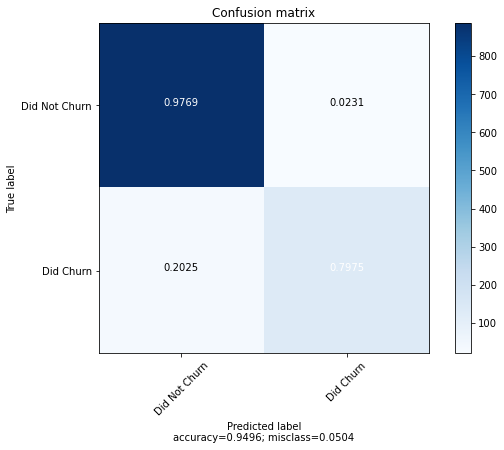

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       908
           1       0.86      0.80      0.83       163

    accuracy                           0.95      1071
   macro avg       0.91      0.89      0.90      1071
weighted avg       0.95      0.95      0.95      1071



In [25]:
# Import KNeighborsClassifier 
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNN object: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit and predict
knn.fit(df_prepared, df_labels) 
churn_predictions = knn.predict(df_prepared)

# Create confusion matrix
churn_cm = confusion_matrix(df_labels, churn_predictions)

# Plot confusion matrix
plot_confusion_matrix(churn_cm, ['Did Not Churn', 'Did Churn'])

# Compute resulting metrics
print(classification_report(df_labels, churn_predictions))

### Random Forest

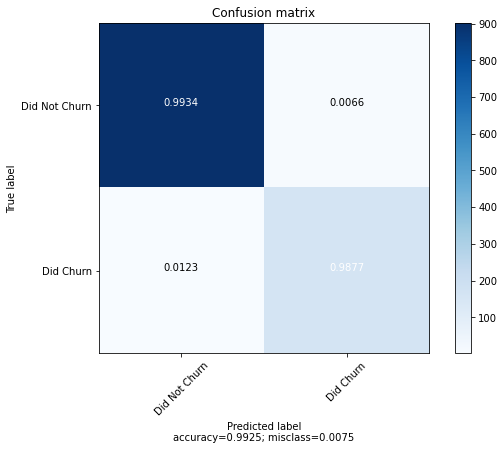

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       908
           1       0.96      0.99      0.98       163

    accuracy                           0.99      1071
   macro avg       0.98      0.99      0.99      1071
weighted avg       0.99      0.99      0.99      1071



In [26]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate RandomForestClassifier object: rf
rf = RandomForestClassifier(n_estimators=400)

# Fit and predict
rf.fit(df_prepared, df_labels)
churn_predictions = rf.predict(df_prepared)

# Create confusion matrix
churn_cm = confusion_matrix(df_labels, churn_predictions)

# Plotting confusion matrix
plot_confusion_matrix(churn_cm, ['Did Not Churn', 'Did Churn'])

# Compute resulting metrics
print(classification_report(df_labels, churn_predictions))

### Ensemble Learning

In [27]:
# Import VotingClassifier and metrics: roc_auc_score, accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, recall_score, precision_score

                
# Instantiate rf and dt objects with best parameters
rf = RandomForestClassifier() #criterion='entropy', max_depth=14, max_features=3, n_estimators=22, random_state=42)
dt = DecisionTreeClassifier() #criterion='gini', max_depth=6, max_features=6, min_samples_leaf=7, random_state=42)

# List of classifiers
classifiers = [
                ('Decision Tree Classification', dt),
                ('Random Forest Classification', rf),
                ]

# Create VotingClassifier object
vc = VotingClassifier(estimators=classifiers)

# Fit and predict
vc.fit(df_prepared, df_labels)
churn_predictions = vc.predict(df_prepared)

# Compute metrics
clf_metrics = [
               ('roc_auc_score', roc_auc_score), 
               ('accuracy_score', accuracy_score), 
               ('f1_score', f1_score), 
               ('recall_score', recall_score),
               ('precision_score', precision_score)
              ]

for name, metric in clf_metrics:
    print(f'{name}: {round(metric(df_labels, churn_predictions), 3)}')

roc_auc_score: 0.983
accuracy_score: 0.993
f1_score: 0.975
recall_score: 0.969
precision_score: 0.981


### Model selection and hypertuning

In [28]:
# Set seed
SEED = 42

# Create parameter grid
param_grid = {
                'max_depth':np.arange(1,20),
                'min_samples_leaf':np.arange(1,10),
                'max_features':np.arange(1,7),
                "criterion": ["gini", "entropy"],
                'n_estimators':np.arange(1, 25)
             }

# Instantiate DecisionTreeClassifier object
rf = RandomForestClassifier(random_state=SEED)

# Perform GridSearchCV
rf_cv = GridSearchCV(rf, param_grid, cv=10, n_jobs=-1, scoring='roc_auc')

# Fit data
rf_cv.fit(df_prepared, df_labels)

# Best Parameters and CV score
print(f'The best parameters: {rf_cv.best_params_}')
print(f'The score is {rf_cv.best_score_}')

The best parameters: {'criterion': 'gini', 'max_depth': 13, 'max_features': 3, 'min_samples_leaf': 2, 'n_estimators': 21}
The score is 0.9819684155713567


In [29]:
# Best RandomForestClassifier model
rf = RandomForestClassifier(criterion='gini', max_depth=13, max_features=3, n_estimators=21, random_state=SEED)

# Fit and predict
rf.fit(df_prepared, df_labels)
rf_predictions = rf.predict(df_prepared)

for name, metric in clf_metrics:
    print(f'{name}: {round(metric(df_labels, rf_predictions), 3)}')

roc_auc_score: 0.987
accuracy_score: 0.992
f1_score: 0.973
recall_score: 0.982
precision_score: 0.964


### Evaluate on test set

In [30]:
# Choose best model: rf
final_model = RandomForestClassifier(criterion='entropy', max_depth=14, max_features=3, n_estimators=22, random_state=42)

# Get X_test and y_test
X_test = test_set.drop('Churn', axis=1)
y_test = test_set['Churn'].copy()

# Use full_pipeline to transform X_test
X_test_prepared = full_pipeline.transform(X_test)

# Final predictions
final_model.fit(X_test_prepared, y_test)
final_predictions = final_model.predict(X_test_prepared)

# Calculate 
for name, metric in clf_metrics:
   print(f'{name}: {round(metric(y_test, final_predictions), 5)}')

roc_auc_score: 0.99286
accuracy_score: 0.9972
f1_score: 0.99281
recall_score: 0.98571
precision_score: 1.0


### How other models performed

#### VotingClassifier
roc_auc_score: 0.845\
accuracy_score: 0.924\
f1_score: 0.787\
recall_score: 0.714\
precision_score: 0.877

#### DecisionTreeClassifier
roc_auc_score: 0.80226\
accuracy_score: 0.89916\
f1_score: 0.71429\
recall_score: 0.64286\
precision_score: 0.80357

### Result
From all the models, the RandomForestClassifier performs the best at predicting customer churn. 